# Dados

## Caminhos

In [1]:
datasets_path     = '/home/jose-roberto/Documents/Disciplinas/INF492/assignment/a5/datasets'
models_path       = '/home/jose-roberto/Documents/Disciplinas/INF492/assignment/a5/models/'
tensorboard_path  = '/home/jose-roberto/Documents/Disciplinas/INF492/assignment/a5/train_runs/'

## Dataloader

In [2]:
from torch.utils.data import DataLoader
import torchvision

import matplotlib.pyplot as plt
import numpy as np

def my_imshow(img, dataset, numImages=10):
  
    if dataset == 'cifar10' : 
        img = img / 2 + 0.5     # unnormalize
    
    img = torchvision.utils.make_grid(img[:numImages],nrow=numImages//2)
    
    npimg = img.numpy()    
    npimg = np.transpose(npimg, (1, 2, 0))
    
    plt.axis('off')
    plt.imshow(npimg)
    plt.show()

def show_images(train_loader, test_loader, dataset, numImages=10) :
    print('Train samples')
    # get some random training images
    dataiter = iter(train_loader)
    images = next(dataiter)[0]
    my_imshow(images, dataset, numImages)
 
    print('Test samples')
    # get some random training images
    dataiter = iter(test_loader)
    images = next(dataiter)[0]
    my_imshow(images, dataset, numImages)

def get_data_cifar10 ( batch_size , show_image=False, numImages=10 ) :
  
    my_transform = torchvision.transforms.Compose([
                            torchvision.transforms.Resize(28),
                            torchvision.transforms.ToTensor(),
                            torchvision.transforms.Normalize(mean=[0.5],std=[0.5])
                                    ])

    train_dataset = torchvision.datasets.CIFAR10(
                                root=f'{datasets_path}/train/', 
                                train=True, 
                                transform=my_transform, 
                                download=False
                                )
    test_dataset = torchvision.datasets.CIFAR10(
                                root=f'{datasets_path}/test/',
                                train=False, 
                                transform=my_transform, 
                                download=False
                                )
    train_loader = DataLoader(train_dataset, 
                                batch_size=batch_size,
                                shuffle=True
                                )
    test_loader = DataLoader(test_dataset, 
                            batch_size=batch_size,
                            shuffle=False
                            )
    
    if show_image :
        show_images(train_loader, test_loader, 'cifar10', numImages)
    
    return train_loader, test_loader, len(train_dataset)


def get_data_mnist ( batch_size , show_image=False, numImages=10 ) :
  
    train_dataset = torchvision.datasets.mnist.MNIST(
                            root=f'{datasets_path}/train/', 
                            train=True, 
                            transform=torchvision.transforms.ToTensor(), 
                            download=False
                            )
    test_dataset = torchvision.datasets.mnist.MNIST(
                            root=f'{datasets_path}/test/',
                            train=False, 
                            transform=torchvision.transforms.ToTensor(), 
                            download=False
                            )

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    
    if show_image :
        show_images(train_loader, test_loader, 'mnist', numImages)
    
    return train_loader, test_loader, len(train_dataset)

Train samples


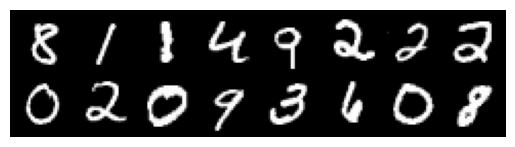

Test samples


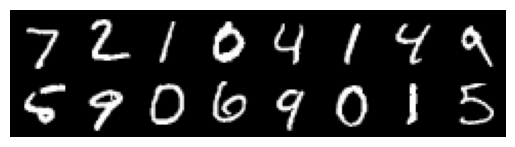

In [3]:
get_data_mnist(batch_size=256, show_image=True, numImages=16);

Train samples


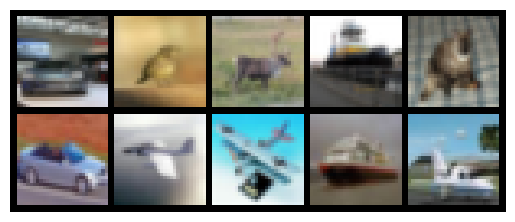

Test samples


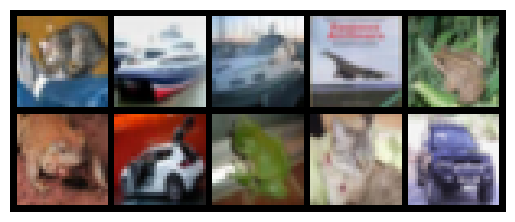

In [4]:
get_data_cifar10(batch_size=256, show_image=True, numImages=10);

# Rede

## Arquitetura

In [24]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class LeNet(nn.Module) :
  
    def __init__(self, num_classes=10, n_channels=1, relu=False):
        super().__init__()

        self.conv1 = nn.Conv2d(in_channels=n_channels, out_channels=6, kernel_size=5, padding=2)
        self.act1 = nn.Sigmoid() if not relu else nn.ReLU()
        self.pool1 = nn.AvgPool2d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        self.pool2 = nn.AvgPool2d(kernel_size=2, stride=2)

        out_channels_conv3 = 120 if n_channels == 1 else 480
        self.conv3 = nn.Conv2d(in_channels=16, out_channels=out_channels_conv3, kernel_size=5)

        in_features_dense1 = out_channels_conv3
        self.dense1 = nn.Linear(in_features=in_features_dense1, out_features=84)
        self.act2 = nn.Tanh() if not relu else nn.ReLU()
        
        self.dense2 = nn.Linear(in_features=84, out_features=num_classes)
        
    def forward(self, x, debug=False):
        if debug : print(f'Shape de entrada: {x.shape}')
        x = self.conv1(x)
        if debug : print(f'Shape de entrada: {x.shape}')
        x = self.act1(x)
        x = self.pool1(x)
        if debug : print(f'Shape de entrada: {x.shape}')
        x = self.conv2(x)
        if debug : print(f'Shape de entrada: {x.shape}')
        x = self.act1(x)
        x = self.pool2(x)
        if debug : print(f'Shape de entrada: {x.shape}')
        x = self.conv3(x)
        if debug : print(f'Shape de entrada: {x.shape}')
        x = self.act1(x)
        x = x.view(x.size(0), -1)
        if debug : print(f'Shape de entrada: {x.shape}')
        x = self.dense1(x)
        if debug : print(f'Shape de entrada: {x.shape}')
        x = self.act2(x)
        x = self.dense2(x)
        if debug : print(f'Shape de entrada: {x.shape}')
        x = self.act2(x)

        return x

## Informações sobre a rede

In [6]:
import torch

if torch.cuda.is_available():
    my_device = torch.device("cuda:0")
else:
    my_device = torch.device("cpu")
    
print(f"Running on {my_device.type}.")

net = LeNet(num_classes=10, n_channels=1)
net = net.to(my_device)

a = torch.rand( (1, 1, 28, 28) )

b = net( a.to(my_device), debug=True)

Running on cpu.
Shape de entrada: torch.Size([1, 1, 28, 28])
Shape de entrada: torch.Size([1, 6, 28, 28])
Shape de entrada: torch.Size([1, 6, 14, 14])
Shape de entrada: torch.Size([1, 16, 10, 10])
Shape de entrada: torch.Size([1, 16, 5, 5])
Shape de entrada: torch.Size([1, 120, 1, 1])
Shape de entrada: torch.Size([1, 120])
Shape de entrada: torch.Size([1, 84])
Shape de entrada: torch.Size([1, 10])


In [7]:
from torchsummary import summary
summary(net, input_size=(1,28,28), batch_size=256)
del net, a, b

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [256, 6, 28, 28]             156
           Sigmoid-2           [256, 6, 28, 28]               0
         AvgPool2d-3           [256, 6, 14, 14]               0
            Conv2d-4          [256, 16, 10, 10]           2,416
           Sigmoid-5          [256, 16, 10, 10]               0
         AvgPool2d-6            [256, 16, 5, 5]               0
            Conv2d-7           [256, 120, 1, 1]          48,120
           Sigmoid-8           [256, 120, 1, 1]               0
            Linear-9                  [256, 84]          10,164
             Tanh-10                  [256, 84]               0
           Linear-11                  [256, 10]             850
             Tanh-12                  [256, 10]               0
Total params: 61,706
Trainable params: 61,706
Non-trainable params: 0
---------------------------------

In [25]:
net = LeNet(num_classes=10, n_channels=3)
net = net.to(my_device)

a = torch.rand( (1, 3, 28, 28) )

b = net( a.to(my_device), debug=True)

from torchsummary import summary
summary(net, input_size=(3,28,28), batch_size=256)
del net, a, b

Shape de entrada: torch.Size([1, 3, 28, 28])
Shape de entrada: torch.Size([1, 6, 28, 28])
Shape de entrada: torch.Size([1, 6, 14, 14])
Shape de entrada: torch.Size([1, 16, 10, 10])
Shape de entrada: torch.Size([1, 16, 5, 5])
Shape de entrada: torch.Size([1, 480, 1, 1])
Shape de entrada: torch.Size([1, 480])
Shape de entrada: torch.Size([1, 84])
Shape de entrada: torch.Size([1, 10])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [256, 6, 28, 28]             456
           Sigmoid-2           [256, 6, 28, 28]               0
         AvgPool2d-3           [256, 6, 14, 14]               0
            Conv2d-4          [256, 16, 10, 10]           2,416
           Sigmoid-5          [256, 16, 10, 10]               0
         AvgPool2d-6            [256, 16, 5, 5]               0
            Conv2d-7           [256, 480, 1, 1]         192,480
           Sigmoid-8           [256, 4

## Treinamento

In [9]:
from torch.utils.tensorboard import SummaryWriter

import torch.optim 

import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

import copy
  
from datetime import datetime

def train ( dataset, epochs=100, lr=1e-1, prefix='', upper_bound=99.0, device='cpu',
           relu=False, save=False, debug=False, plot_histograms=False, lambda_reg=0) :

    if dataset == 'mnist' :
        batch_size = 256
        train_loader, test_loader, dataset_size = get_data_mnist(batch_size, 
                                                                    show_image=True
                                                                    )
        num_classes = 10
        n_channels = 1
    elif dataset == 'cifar10' :
        batch_size = 256
        train_loader, test_loader, dataset_size = get_data_cifar10(batch_size, 
                                                                    show_image=True
                                                                    )
        num_classes = 10
        n_channels = 3
    else :
        print('Dataset loader not implemented.')
        return None    
  
    net = LeNet( num_classes, n_channels, relu=relu )
    net.to(device)

    optimizer = torch.optim.SGD(net.parameters(), lr, weight_decay=lambda_reg)
    loss = nn.CrossEntropyLoss()

    now = datetime.now()
    suffix = now.strftime("%Y%m%d_%H%M%S")
    prefix = prefix + '-' + suffix if prefix != '' else suffix

    writer = SummaryWriter( log_dir=tensorboard_path+prefix )
    
    writer.add_graph(net, next(iter(train_loader))[0].to(my_device))

    accuracies = []
    max_accuracy = -1.0

    for epoch in tqdm( range(epochs) , desc='Training epochs...' ) :
        net.train()  
        for idx, (train_x, train_label) in enumerate(train_loader):
            train_x = train_x.to(device)
            train_label = train_label.to(device)

            optimizer.zero_grad()

            predict_y = net( train_x )

            # Loss:
            error = loss( predict_y , train_label.long() )

            writer.add_scalar( 'Loss/train', error, 
                            idx+( epoch*(dataset_size//batch_size) ) )

            error.backward()
            optimizer.step()

            # Accuracy:
            predict_ys = torch.max( predict_y, axis=1 )[1]
            correct    = torch.sum(predict_ys == train_label)

            writer.add_scalar( 'Accuracy/train', correct/train_x.size(0), 
                            idx+( epoch*(dataset_size//batch_size) ) )

            if debug and idx % 10 == 0 :
                print(f'idx: {idx}, _error: {error}')

        if plot_histograms : 
            plot_histograms_tensorboard(writer, net, epoch)
        
        accuracy = validate(net, test_loader, device=device)
        accuracies.append(accuracy.cpu())
        writer.add_scalar( 'Accuracy/test', accuracy, epoch )
    
        if accuracy > max_accuracy:
            best_model = copy.deepcopy(net)
            max_accuracy = accuracy
            print(f'Saving Best Model with Accuracy: {max_accuracy:3.4f}')
            
        print( f'Epoch: {epoch+1:3d} | Accuracy : {accuracy:3.4f}%' )

        if accuracy > upper_bound :
            break
   
    if save : 
        path = f'{models_path}{'relu-' if relu else ''}LeNet5-{dataset}-{max_accuracy:.2f}.pkl'
        torch.save(best_model.state_dict(), path)
        print('Model saved in:',path)
  
    plt.plot(accuracies)

    writer.flush()
    writer.close()
    
    return best_model

In [10]:
def plot_histograms_tensorboard ( writer, net, epoch ) :
    writer.add_histogram('Bias/conv1',   net.conv1.bias,        epoch)
    writer.add_histogram('Weight/conv1', net.conv1.weight,      epoch)
    writer.add_histogram('Grad/conv1',   net.conv1.weight.grad, epoch)

    writer.add_histogram('Bias/conv2',   net.conv2.bias,        epoch)
    writer.add_histogram('Weight/conv2', net.conv2.weight,      epoch)
    writer.add_histogram('Grad/conv2',   net.conv2.weight.grad, epoch)

    writer.add_histogram('Bias/conv3',   net.conv3.bias,        epoch)
    writer.add_histogram('Weight/conv3', net.conv3.weight,      epoch)
    writer.add_histogram('Grad/conv3',   net.conv3.weight.grad, epoch)

## Validação

In [11]:
def validate ( model , data , device='cpu') :
    model.eval()
    correct = 0
    sum = 0
    
    for idx, (test_x, test_label) in enumerate(data) : 
        test_x = test_x.to(device)
        test_label = test_label.to(device)
        predict_y = model( test_x ).detach()
        predict_ys = torch.max( predict_y, axis=1 )[1]
        sum = sum + test_x.size(0)
        correct = correct + torch.sum(predict_ys == test_label)
    
    return correct*100./sum

# Execução

## Treina

In [12]:
if torch.cuda.is_available():
    my_device = torch.device("cuda:0")
else:
    my_device = torch.device("cpu")
print(f"Running on {my_device.type}.")

Running on cpu.


### MNIST - Sigmoid e Tahn

Train samples


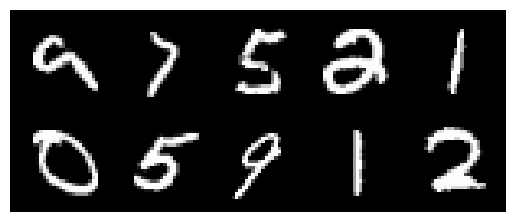

Test samples


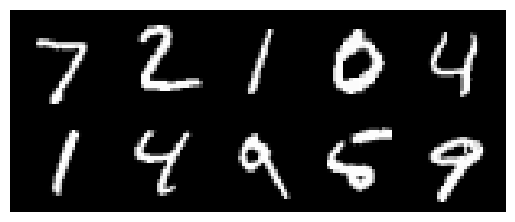

Training epochs...:   3%|▎         | 1/30 [00:15<07:29, 15.51s/it]

Saving Best Model with Accuracy: 11.3500
Epoch:   1 | Accuracy : 11.3500%


Training epochs...:   7%|▋         | 2/30 [00:31<07:29, 16.07s/it]

Epoch:   2 | Accuracy : 11.3500%


Training epochs...:  10%|█         | 3/30 [00:48<07:17, 16.20s/it]

Epoch:   3 | Accuracy : 11.3500%


Training epochs...:  13%|█▎        | 4/30 [01:04<06:56, 16.03s/it]

Epoch:   4 | Accuracy : 11.3500%


Training epochs...:  17%|█▋        | 5/30 [01:20<06:43, 16.13s/it]

Epoch:   5 | Accuracy : 11.3500%


Training epochs...:  20%|██        | 6/30 [01:36<06:26, 16.09s/it]

Epoch:   6 | Accuracy : 11.3500%


Training epochs...:  23%|██▎       | 7/30 [01:52<06:07, 15.99s/it]

Epoch:   7 | Accuracy : 11.3500%


Training epochs...:  27%|██▋       | 8/30 [02:08<05:54, 16.11s/it]

Epoch:   8 | Accuracy : 11.3500%


Training epochs...:  30%|███       | 9/30 [02:25<05:40, 16.22s/it]

Epoch:   9 | Accuracy : 11.3500%


Training epochs...:  33%|███▎      | 10/30 [02:40<05:22, 16.11s/it]

Saving Best Model with Accuracy: 50.9600
Epoch:  10 | Accuracy : 50.9600%


Training epochs...:  37%|███▋      | 11/30 [02:56<05:04, 16.03s/it]

Saving Best Model with Accuracy: 86.6700
Epoch:  11 | Accuracy : 86.6700%


Training epochs...:  40%|████      | 12/30 [03:12<04:47, 15.95s/it]

Saving Best Model with Accuracy: 89.7200
Epoch:  12 | Accuracy : 89.7200%


Training epochs...:  43%|████▎     | 13/30 [03:29<04:34, 16.12s/it]

Saving Best Model with Accuracy: 92.8500
Epoch:  13 | Accuracy : 92.8500%


Training epochs...:  47%|████▋     | 14/30 [03:45<04:20, 16.26s/it]

Saving Best Model with Accuracy: 93.6000
Epoch:  14 | Accuracy : 93.6000%


Training epochs...:  50%|█████     | 15/30 [04:02<04:07, 16.48s/it]

Saving Best Model with Accuracy: 94.9500
Epoch:  15 | Accuracy : 94.9500%


Training epochs...:  53%|█████▎    | 16/30 [04:19<03:50, 16.50s/it]

Epoch:  16 | Accuracy : 93.9800%


Training epochs...:  57%|█████▋    | 17/30 [04:36<03:37, 16.71s/it]

Epoch:  17 | Accuracy : 94.7500%


Training epochs...:  60%|██████    | 18/30 [04:52<03:18, 16.53s/it]

Saving Best Model with Accuracy: 96.6400
Epoch:  18 | Accuracy : 96.6400%


Training epochs...:  63%|██████▎   | 19/30 [05:08<02:59, 16.32s/it]

Saving Best Model with Accuracy: 97.0100
Epoch:  19 | Accuracy : 97.0100%


Training epochs...:  67%|██████▋   | 20/30 [05:24<02:44, 16.42s/it]

Epoch:  20 | Accuracy : 96.6000%


Training epochs...:  70%|███████   | 21/30 [05:40<02:26, 16.31s/it]

Saving Best Model with Accuracy: 97.4400
Epoch:  21 | Accuracy : 97.4400%


Training epochs...:  73%|███████▎  | 22/30 [05:57<02:10, 16.36s/it]

Epoch:  22 | Accuracy : 96.2700%


Training epochs...:  77%|███████▋  | 23/30 [06:14<01:55, 16.49s/it]

Saving Best Model with Accuracy: 97.6300
Epoch:  23 | Accuracy : 97.6300%


Training epochs...:  80%|████████  | 24/30 [06:30<01:38, 16.46s/it]

Saving Best Model with Accuracy: 97.8100
Epoch:  24 | Accuracy : 97.8100%


Training epochs...:  83%|████████▎ | 25/30 [06:47<01:22, 16.56s/it]

Epoch:  25 | Accuracy : 97.7800%


Training epochs...:  87%|████████▋ | 26/30 [07:03<01:05, 16.41s/it]

Saving Best Model with Accuracy: 97.9100
Epoch:  26 | Accuracy : 97.9100%


Training epochs...:  90%|█████████ | 27/30 [07:19<00:49, 16.40s/it]

Epoch:  27 | Accuracy : 97.6200%


Training epochs...:  93%|█████████▎| 28/30 [07:35<00:32, 16.26s/it]

Saving Best Model with Accuracy: 98.1900
Epoch:  28 | Accuracy : 98.1900%


Training epochs...:  97%|█████████▋| 29/30 [07:51<00:16, 16.12s/it]

Epoch:  29 | Accuracy : 97.0900%


Training epochs...: 100%|██████████| 30/30 [08:09<00:00, 16.30s/it]

Epoch:  30 | Accuracy : 98.1800%
Model saved in: /home/jose-roberto/Documents/Disciplinas/INF492/assignment/a5/models/LeNet5-mnist-98.19.pkl


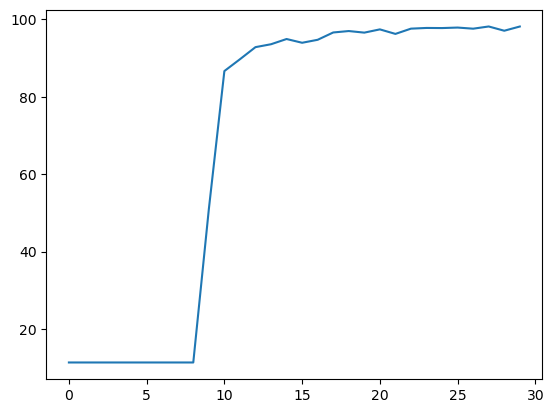

In [38]:
epochs = 30
dataset = 'mnist' # 'cifar10' 
lr = 1.3e0
lambda_reg = 0

prefix = 'LeNet-{}-e-{}-lr-{}'.format(dataset, epochs, lr)

net = train( dataset=dataset, epochs=epochs, lr=lr, prefix=prefix , upper_bound=100, device=my_device,
            relu=False, save=True, debug=False, plot_histograms=True, lambda_reg=lambda_reg )

### MNIST - ReLu

Train samples


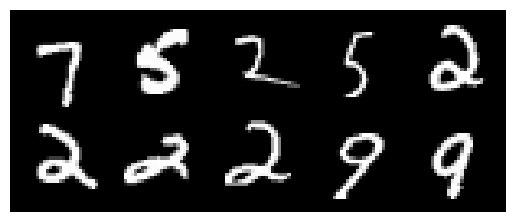

Test samples


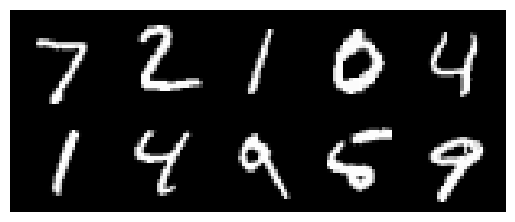

Training epochs...:   3%|▎         | 1/30 [00:15<07:18, 15.12s/it]

Saving Best Model with Accuracy: 12.7600
Epoch:   1 | Accuracy : 12.7600%


Training epochs...:   7%|▋         | 2/30 [00:29<06:56, 14.86s/it]

Saving Best Model with Accuracy: 49.2600
Epoch:   2 | Accuracy : 49.2600%


Training epochs...:  10%|█         | 3/30 [00:44<06:42, 14.91s/it]

Saving Best Model with Accuracy: 77.9200
Epoch:   3 | Accuracy : 77.9200%


Training epochs...:  13%|█▎        | 4/30 [01:00<06:36, 15.27s/it]

Saving Best Model with Accuracy: 83.6800
Epoch:   4 | Accuracy : 83.6800%


Training epochs...:  17%|█▋        | 5/30 [01:16<06:29, 15.56s/it]

Saving Best Model with Accuracy: 90.5100
Epoch:   5 | Accuracy : 90.5100%


Training epochs...:  20%|██        | 6/30 [01:33<06:21, 15.89s/it]

Saving Best Model with Accuracy: 93.0100
Epoch:   6 | Accuracy : 93.0100%


Training epochs...:  23%|██▎       | 7/30 [01:50<06:13, 16.26s/it]

Saving Best Model with Accuracy: 93.9400
Epoch:   7 | Accuracy : 93.9400%


Training epochs...:  27%|██▋       | 8/30 [02:05<05:54, 16.11s/it]

Saving Best Model with Accuracy: 94.4200
Epoch:   8 | Accuracy : 94.4200%


Training epochs...:  30%|███       | 9/30 [02:23<05:44, 16.42s/it]

Saving Best Model with Accuracy: 95.9400
Epoch:   9 | Accuracy : 95.9400%


Training epochs...:  33%|███▎      | 10/30 [02:39<05:28, 16.43s/it]

Saving Best Model with Accuracy: 96.3800
Epoch:  10 | Accuracy : 96.3800%


Training epochs...:  37%|███▋      | 11/30 [02:55<05:08, 16.24s/it]

Saving Best Model with Accuracy: 96.7100
Epoch:  11 | Accuracy : 96.7100%


Training epochs...:  40%|████      | 12/30 [03:11<04:53, 16.30s/it]

Saving Best Model with Accuracy: 97.0300
Epoch:  12 | Accuracy : 97.0300%


Training epochs...:  43%|████▎     | 13/30 [03:27<04:33, 16.07s/it]

Epoch:  13 | Accuracy : 96.8600%


Training epochs...:  47%|████▋     | 14/30 [03:43<04:16, 16.02s/it]

Epoch:  14 | Accuracy : 96.7400%


Training epochs...:  50%|█████     | 15/30 [04:00<04:04, 16.33s/it]

Saving Best Model with Accuracy: 97.2800
Epoch:  15 | Accuracy : 97.2800%


Training epochs...:  53%|█████▎    | 16/30 [04:15<03:45, 16.13s/it]

Epoch:  16 | Accuracy : 97.1100%


Training epochs...:  57%|█████▋    | 17/30 [04:31<03:27, 15.99s/it]

Epoch:  17 | Accuracy : 97.0700%


Training epochs...:  60%|██████    | 18/30 [04:47<03:11, 15.98s/it]

Epoch:  18 | Accuracy : 96.9800%


Training epochs...:  63%|██████▎   | 19/30 [05:03<02:54, 15.89s/it]

Saving Best Model with Accuracy: 97.7200
Epoch:  19 | Accuracy : 97.7200%


Training epochs...:  67%|██████▋   | 20/30 [05:18<02:38, 15.83s/it]

Epoch:  20 | Accuracy : 94.9600%


Training epochs...:  70%|███████   | 21/30 [05:34<02:22, 15.85s/it]

Epoch:  21 | Accuracy : 97.1800%


Training epochs...:  73%|███████▎  | 22/30 [05:51<02:08, 16.08s/it]

Saving Best Model with Accuracy: 97.8100
Epoch:  22 | Accuracy : 97.8100%


Training epochs...:  77%|███████▋  | 23/30 [06:08<01:54, 16.31s/it]

Epoch:  23 | Accuracy : 96.6900%


Training epochs...:  80%|████████  | 24/30 [06:24<01:38, 16.38s/it]

Epoch:  24 | Accuracy : 97.6100%


Training epochs...:  83%|████████▎ | 25/30 [06:41<01:21, 16.34s/it]

Saving Best Model with Accuracy: 98.0800
Epoch:  25 | Accuracy : 98.0800%


Training epochs...:  87%|████████▋ | 26/30 [06:57<01:05, 16.25s/it]

Epoch:  26 | Accuracy : 97.8600%


Training epochs...:  90%|█████████ | 27/30 [07:13<00:48, 16.17s/it]

Epoch:  27 | Accuracy : 97.7700%


Training epochs...:  93%|█████████▎| 28/30 [07:29<00:32, 16.15s/it]

Epoch:  28 | Accuracy : 97.8000%


Training epochs...:  97%|█████████▋| 29/30 [07:45<00:16, 16.17s/it]

Saving Best Model with Accuracy: 98.2200
Epoch:  29 | Accuracy : 98.2200%


Training epochs...: 100%|██████████| 30/30 [08:01<00:00, 16.04s/it]

Saving Best Model with Accuracy: 98.4000
Epoch:  30 | Accuracy : 98.4000%
Model saved in: /home/jose-roberto/Documents/Disciplinas/INF492/assignment/a5/models/relu-LeNet5-mnist-98.40.pkl


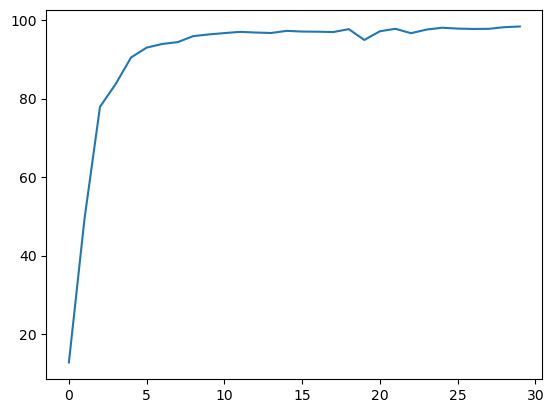

In [40]:
epochs = 30
dataset = 'mnist' # 'cifar10' 
lr = 5e-2
lambda_reg = 0

prefix = 'relu-LeNet-{}-e-{}-lr-{}'.format(dataset, epochs, lr)

net_relu = train( dataset=dataset, epochs=epochs, lr=lr, prefix=prefix , upper_bound=100, device=my_device,
            relu=True, save=True, debug=False, plot_histograms=True, lambda_reg=lambda_reg )

### CIFAR10 - ReLu

Train samples


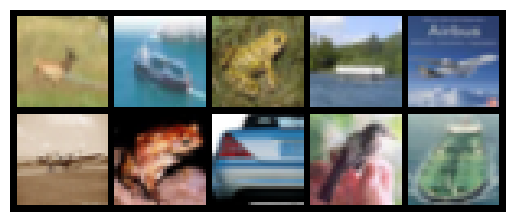

Test samples


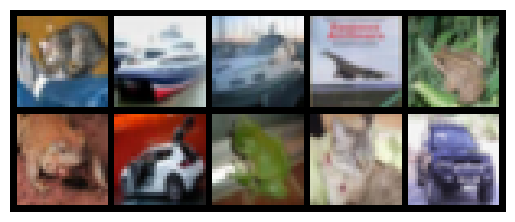

Training epochs...:   3%|▎         | 1/30 [00:22<10:43, 22.19s/it]

Saving Best Model with Accuracy: 16.6100
Epoch:   1 | Accuracy : 16.6100%


Training epochs...:   7%|▋         | 2/30 [00:45<10:31, 22.56s/it]

Saving Best Model with Accuracy: 18.1400
Epoch:   2 | Accuracy : 18.1400%


Training epochs...:  10%|█         | 3/30 [01:09<10:34, 23.50s/it]

Saving Best Model with Accuracy: 24.7400
Epoch:   3 | Accuracy : 24.7400%


Training epochs...:  13%|█▎        | 4/30 [01:35<10:35, 24.46s/it]

Saving Best Model with Accuracy: 32.8100
Epoch:   4 | Accuracy : 32.8100%


Training epochs...:  17%|█▋        | 5/30 [02:00<10:17, 24.68s/it]

Saving Best Model with Accuracy: 38.0400
Epoch:   5 | Accuracy : 38.0400%


Training epochs...:  20%|██        | 6/30 [02:26<10:02, 25.12s/it]

Saving Best Model with Accuracy: 38.6900
Epoch:   6 | Accuracy : 38.6900%


Training epochs...:  23%|██▎       | 7/30 [02:52<09:46, 25.49s/it]

Saving Best Model with Accuracy: 41.9100
Epoch:   7 | Accuracy : 41.9100%


Training epochs...:  27%|██▋       | 8/30 [03:17<09:17, 25.34s/it]

Saving Best Model with Accuracy: 46.7100
Epoch:   8 | Accuracy : 46.7100%


Training epochs...:  30%|███       | 9/30 [03:43<08:51, 25.32s/it]

Saving Best Model with Accuracy: 47.0900
Epoch:   9 | Accuracy : 47.0900%


Training epochs...:  33%|███▎      | 10/30 [04:08<08:25, 25.27s/it]

Saving Best Model with Accuracy: 47.1300
Epoch:  10 | Accuracy : 47.1300%


Training epochs...:  37%|███▋      | 11/30 [04:34<08:03, 25.45s/it]

Epoch:  11 | Accuracy : 41.9400%


Training epochs...:  40%|████      | 12/30 [04:59<07:37, 25.43s/it]

Saving Best Model with Accuracy: 49.9500
Epoch:  12 | Accuracy : 49.9500%


Training epochs...:  43%|████▎     | 13/30 [05:25<07:12, 25.46s/it]

Saving Best Model with Accuracy: 50.0100
Epoch:  13 | Accuracy : 50.0100%


Training epochs...:  47%|████▋     | 14/30 [05:51<06:49, 25.61s/it]

Saving Best Model with Accuracy: 50.2100
Epoch:  14 | Accuracy : 50.2100%


Training epochs...:  50%|█████     | 15/30 [06:16<06:24, 25.61s/it]

Epoch:  15 | Accuracy : 49.6300%


Training epochs...:  53%|█████▎    | 16/30 [06:43<06:01, 25.84s/it]

Saving Best Model with Accuracy: 51.6200
Epoch:  16 | Accuracy : 51.6200%


Training epochs...:  57%|█████▋    | 17/30 [07:08<05:34, 25.70s/it]

Epoch:  17 | Accuracy : 43.8900%


Training epochs...:  60%|██████    | 18/30 [07:33<05:07, 25.65s/it]

Epoch:  18 | Accuracy : 46.8400%


Training epochs...:  63%|██████▎   | 19/30 [07:59<04:42, 25.64s/it]

Epoch:  19 | Accuracy : 49.9800%


Training epochs...:  67%|██████▋   | 20/30 [08:26<04:19, 25.94s/it]

Saving Best Model with Accuracy: 52.4700
Epoch:  20 | Accuracy : 52.4700%


Training epochs...:  70%|███████   | 21/30 [08:52<03:55, 26.19s/it]

Epoch:  21 | Accuracy : 47.4000%


Training epochs...:  73%|███████▎  | 22/30 [09:19<03:30, 26.33s/it]

Saving Best Model with Accuracy: 53.7300
Epoch:  22 | Accuracy : 53.7300%


Training epochs...:  77%|███████▋  | 23/30 [09:45<03:02, 26.12s/it]

Epoch:  23 | Accuracy : 53.1400%


Training epochs...:  80%|████████  | 24/30 [10:12<02:38, 26.36s/it]

Saving Best Model with Accuracy: 55.2500
Epoch:  24 | Accuracy : 55.2500%


Training epochs...:  83%|████████▎ | 25/30 [10:37<02:10, 26.15s/it]

Saving Best Model with Accuracy: 55.4700
Epoch:  25 | Accuracy : 55.4700%


Training epochs...:  87%|████████▋ | 26/30 [11:04<01:45, 26.40s/it]

Epoch:  26 | Accuracy : 53.9100%


Training epochs...:  90%|█████████ | 27/30 [11:31<01:19, 26.34s/it]

Epoch:  27 | Accuracy : 53.8900%


Training epochs...:  93%|█████████▎| 28/30 [11:57<00:52, 26.37s/it]

Epoch:  28 | Accuracy : 53.9700%


Training epochs...:  97%|█████████▋| 29/30 [12:24<00:26, 26.51s/it]

Epoch:  29 | Accuracy : 54.5500%


Training epochs...: 100%|██████████| 30/30 [12:50<00:00, 25.68s/it]

Saving Best Model with Accuracy: 56.4200
Epoch:  30 | Accuracy : 56.4200%
Model saved in: /home/jose-roberto/Documents/Disciplinas/INF492/assignment/a5/models/relu-LeNet5-cifar10-56.42.pkl


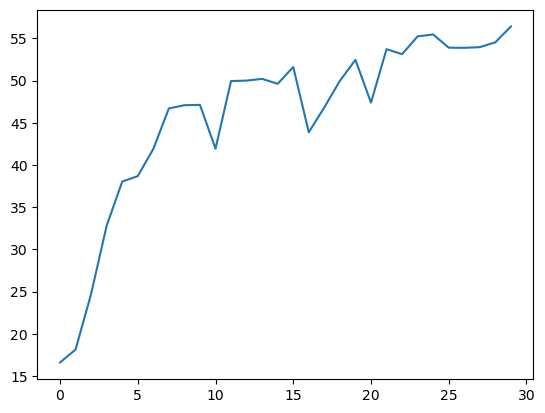

In [41]:
epochs = 30
dataset = 'cifar10' # 'mnist' 
lr = 5e-2
lambda_reg = 0

prefix = 'relu-LeNet-{}-e-{}-lr-{}'.format(dataset, epochs, lr)

net_relu = train( dataset=dataset, epochs=epochs, lr=lr, prefix=prefix , upper_bound=100, device=my_device,
            relu=True, save=True, debug=False, plot_histograms=True, lambda_reg=lambda_reg )

# Carregar Rede de arquivo

In [43]:
path = '/home/jose-roberto/Documents/Disciplinas/INF492/assignment/a5/models/LeNet5-mnist-98.19.pkl'
path_relu = '/home/jose-roberto/Documents/Disciplinas/INF492/assignment/a5/models/relu-LeNet5-mnist-98.40.pkl'
path_cifar10 = '/home/jose-roberto/Documents/Disciplinas/INF492/assignment/a5/models/relu-LeNet5-cifar10-56.42.pkl'

n_channels = 1

def load_LeNet ( device , path, n_channels=1, relu=False ) :
    net = LeNet(num_classes=10, n_channels=n_channels, relu=relu)
    net = net.to(device)
    net.load_state_dict(torch.load(path))
    net.eval()
    return net

net_mnist = load_LeNet(my_device, path)
net_relu = load_LeNet(my_device, path_relu, relu=True)
net_cifar10 = load_LeNet(my_device, path_cifar10, n_channels=3, relu=True)

# Carregar dado do MNIST e inferir

In [44]:
import PIL
import torchvision
import numpy as np

def sample_and_predict_mnist ( net, seed=None, relu=False ) :

    if seed is not None :
        np.random.seed(seed)

    dataset = torchvision.datasets.MNIST(
                                      root=f'{datasets_path}/test/', 
                                      train=False
                                      )
 
    i = np.random.randint(len(dataset))
    sample = dataset[i][0]

    x = torchvision.transforms.ToTensor()(sample).float()

    x = x.unsqueeze_(0)

    x = x.to(my_device)

    y = net ( x )

    if relu:
        y = torch.softmax(y, dim=1)
    
    confidence = torch.max(y, 1)[0]
    prediction = torch.max(y, 1)[1]

    print( 'Sample: {}'.format(i) )
    plt.axis('off')
    plt.imshow( sample , cmap='gray')

    confidence = confidence.data.cpu().numpy()[0]
    prediction = prediction.data.cpu().numpy()[0]

    return prediction, confidence, dataset[i][1]

Sample: 8333

Predicted clas: 6 
Classifier confidence: 99.99% 
True label: 6


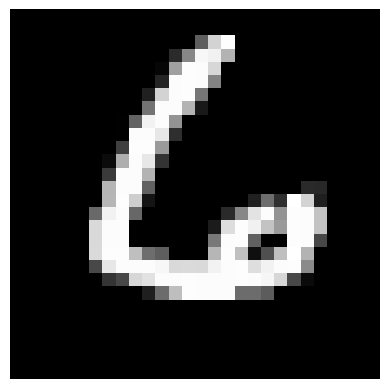

In [45]:
prediction, confidence, label = sample_and_predict_mnist(net_mnist)
print( f'\nPredicted clas: {prediction} \nClassifier confidence: {confidence*100:4.2f}% \nTrue label: {label}' )

Sample: 9209

Predicted clas: 2 
Classifier confidence: 99.94% 
True label: 2


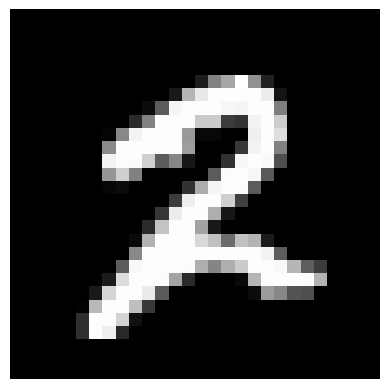

In [46]:
prediction, confidence, label = sample_and_predict_mnist(net_relu, relu=True)
print( f'\nPredicted clas: {prediction} \nClassifier confidence: {confidence*100:4.2f}% \nTrue label: {label}' )

# Carregar dado do CIFAR10 e inferir

In [47]:
import PIL
import torchvision
import numpy as np

def sample_and_predict_cifar10 ( net, seed=None, relu=False ) :

    if seed is not None :
        np.random.seed(seed)

    
    my_transform = torchvision.transforms.Compose([
                            torchvision.transforms.Resize(28),
                            torchvision.transforms.ToTensor(),
                            torchvision.transforms.Normalize(mean=[0.5],std=[0.5])
                                    ])

    dataset = torchvision.datasets.CIFAR10(
                                      root=f'{datasets_path}/test/',
                                      transform=my_transform,
                                      train=False
                                      )
 
    i = np.random.randint(len(dataset))
    x = dataset[i][0]

    sample = np.array(x)
    sample = np.transpose(sample, (1, 2, 0))

    x = x.unsqueeze_(0)

    x = x.to(my_device)

    y = net ( x )

    if relu:
        y = torch.softmax(y, dim=1)
    
    confidence = torch.max(y, 1)[0]
    prediction = torch.max(y, 1)[1]

    print( 'Sample: {}'.format(i) )
    plt.axis('off')
    plt.imshow( sample )

    confidence = confidence.data.cpu().numpy()[0]
    prediction = prediction.data.cpu().numpy()[0]

    return prediction, confidence, dataset[i][1]

/tmp/ipykernel_12544/2333663424.py:26: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  sample = np.array(x)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.99215686..0.9843137].


Sample: 9810

Predicted clas: 5 
Classifier confidence: 41.94% 
True label: 8


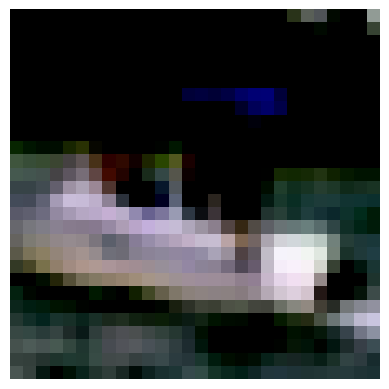

In [48]:
prediction, confidence, label = sample_and_predict_cifar10(net_cifar10, relu=True)
print( f'\nPredicted clas: {prediction} \nClassifier confidence: {confidence*100:4.2f}% \nTrue label: {label}' )

# Conclusões

Analisando os gráficos plotados no TensorBoard, temos que a Loss para Sigmoid/Tahn estabiliza-se mais rapidamente, enquanto para ReLu há um decaimento maior. Para a acurácia, vemos que com ReLu há uma convergência muito mais rápida, enquanto para Sigmoid/Tahn os valores ficam estagnados e aumentam lentamente até se estabilizarem em uma faixa superior. Acompanhando o treino, vemos que para Sigmoid/Tahn foram necessárias 28 épocas para atingir 98% de acurácia, enquanto para ReLu foram necessárias 25.

E sobre a aplicação da mesma arquitetura no dataset CIFAR10, nota-se que o resultado máximo não foi satisfatório (aprox. 56% de acurácia). Isto era esperado, pois o dado é bem mais complexo comparado com o MNIST, contendo objetos complexos do mundo real, representados em três canais (RGB) e com bastante variações entre si.